In [1]:
from processed_image import ProcessedImage, read_from_dir, show_image_strip
imgs = list(read_from_dir('..\\Data\\LittleCarDb1'))
[str(img) for img in imgs[0:5]]

['ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-001_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-002_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-005_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-007_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-008_1.jpg (0 in cache)']

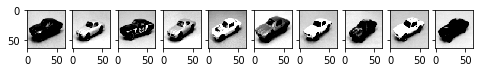

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
_, axes = plt.subplots(1, 10, sharey=True, figsize=(8,1.5))
show_image_strip(imgs, axes)

In [ ]:
_, axes = plt.subplots(2, 10, sharey=True, figsize=(8,1.5))
processed_dict = {img.fullpath:img.get_processed_image() for img in imgs}
show_image_strip(imgs, axes, predicted_dict=processed_dict)

In [3]:
import numpy as np
import random
random.shuffle(imgs)
x_train = [img.get_processed_image(size=128) for img in imgs]
x_train = np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))

test_size = int(len(x_train)/10)
x_test = x_train[0:test_size]
x_train = x_train[test_size+1:]
x_train.shape, x_test.shape

((225, 128, 128, 1), (25, 128, 128, 1))

In [14]:
from model_vae_3stage import ModelVae3Stage
all_model = ModelVae3Stage(size=128, in_channels=1, latent_dim=32)
vae, enc, dec = all_model.vae, all_model.encoder, all_model.decoder

In [15]:
vae.fit(x_train, x_train, epochs=1000, batch_size=256, 
        shuffle=True, validation_data=(x_test,x_test))

Train on 225 samples, validate on 25 samples
Epoch 1/1000
225/225 [==============================] - 2s 10ms/step - loss: 2266.6113 - val_loss: 2138.2319
Epoch 2/1000
225/225 [==============================] - 0s 1ms/step - loss: 2236.5449 - val_loss: 2014.5481
Epoch 3/1000
225/225 [==============================] - 0s 1ms/step - loss: 2138.8616 - val_loss: 1766.9059
Epoch 4/1000
225/225 [==============================] - 0s 1ms/step - loss: 1948.0253 - val_loss: 3049.1387
Epoch 5/1000
225/225 [==============================] - 0s 1ms/step - loss: 2985.1963 - val_loss: 2029.9871
Epoch 6/1000
225/225 [==============================] - 0s 1ms/step - loss: 2108.7405 - val_loss: 1805.9868
Epoch 7/1000
225/225 [==============================] - 0s 1ms/step - loss: 1910.5565 - val_loss: 1423.3522
Epoch 8/1000
225/225 [==============================] - 0s 1ms/step - loss: 1579.7977 - val_loss: 1345.3950
Epoch 9/1000
225/225 [==============================] - 0s 1ms/step - loss: 1428.6240 - va

Epoch 77/1000
225/225 [==============================] - 0s 1ms/step - loss: 902.4620 - val_loss: 885.4885
Epoch 78/1000
225/225 [==============================] - 0s 1ms/step - loss: 905.4828 - val_loss: 931.7863
Epoch 79/1000
225/225 [==============================] - 0s 1ms/step - loss: 932.1412 - val_loss: 894.2784
Epoch 80/1000
225/225 [==============================] - 0s 1ms/step - loss: 938.5298 - val_loss: 985.0532
Epoch 81/1000
225/225 [==============================] - 0s 1ms/step - loss: 980.9868 - val_loss: 867.6611
Epoch 82/1000
225/225 [==============================] - 0s 1ms/step - loss: 925.8525 - val_loss: 870.7026
Epoch 83/1000
225/225 [==============================] - 0s 1ms/step - loss: 902.8824 - val_loss: 829.9047
Epoch 84/1000
225/225 [==============================] - 0s 1ms/step - loss: 880.5035 - val_loss: 841.6540
Epoch 85/1000
225/225 [==============================] - 0s 1ms/step - loss: 862.8199 - val_loss: 815.7927
Epoch 86/1000
225/225 [==============

225/225 [==============================] - 0s 1ms/step - loss: 811.0590 - val_loss: 808.9825
Epoch 154/1000
225/225 [==============================] - 0s 1ms/step - loss: 813.4194 - val_loss: 792.9235
Epoch 155/1000
225/225 [==============================] - 0s 1ms/step - loss: 818.1163 - val_loss: 798.1824
Epoch 156/1000
225/225 [==============================] - 0s 1ms/step - loss: 815.0636 - val_loss: 808.3150
Epoch 157/1000
225/225 [==============================] - 0s 1ms/step - loss: 817.0862 - val_loss: 812.9303
Epoch 158/1000
225/225 [==============================] - 0s 1ms/step - loss: 822.8157 - val_loss: 822.2633
Epoch 159/1000
225/225 [==============================] - 0s 1ms/step - loss: 831.1182 - val_loss: 789.5715
Epoch 160/1000
225/225 [==============================] - 0s 1ms/step - loss: 825.6984 - val_loss: 817.4587
Epoch 161/1000
225/225 [==============================] - 0s 1ms/step - loss: 821.8068 - val_loss: 793.8080
Epoch 162/1000
225/225 [===================

Epoch 229/1000
225/225 [==============================] - 0s 1ms/step - loss: 754.7863 - val_loss: 728.4836
Epoch 230/1000
225/225 [==============================] - 0s 1ms/step - loss: 760.1245 - val_loss: 770.3483
Epoch 231/1000
225/225 [==============================] - 0s 1ms/step - loss: 785.4243 - val_loss: 764.7734
Epoch 232/1000
225/225 [==============================] - 0s 1ms/step - loss: 808.2302 - val_loss: 834.4028
Epoch 233/1000
225/225 [==============================] - 0s 1ms/step - loss: 841.0918 - val_loss: 729.8571
Epoch 234/1000
225/225 [==============================] - 0s 1ms/step - loss: 785.8648 - val_loss: 762.8502
Epoch 235/1000
225/225 [==============================] - 0s 1ms/step - loss: 752.9376 - val_loss: 711.3641
Epoch 236/1000
225/225 [==============================] - 0s 1ms/step - loss: 744.3003 - val_loss: 743.0980
Epoch 237/1000
225/225 [==============================] - 0s 1ms/step - loss: 743.3614 - val_loss: 730.0567
Epoch 238/1000
225/225 [====

Epoch 305/1000
225/225 [==============================] - 0s 1ms/step - loss: 692.5065 - val_loss: 710.6992
Epoch 306/1000
225/225 [==============================] - 0s 1ms/step - loss: 702.5651 - val_loss: 757.9208
Epoch 307/1000
225/225 [==============================] - 0s 1ms/step - loss: 755.1036 - val_loss: 780.9221
Epoch 308/1000
225/225 [==============================] - 0s 1ms/step - loss: 774.0019 - val_loss: 832.5442
Epoch 309/1000
225/225 [==============================] - 0s 1ms/step - loss: 804.4965 - val_loss: 726.0433
Epoch 310/1000
225/225 [==============================] - 0s 1ms/step - loss: 721.5855 - val_loss: 728.0922
Epoch 311/1000
225/225 [==============================] - 0s 1ms/step - loss: 696.2408 - val_loss: 686.2905
Epoch 312/1000
225/225 [==============================] - 0s 1ms/step - loss: 687.2612 - val_loss: 684.4005
Epoch 313/1000
225/225 [==============================] - 0s 1ms/step - loss: 670.9106 - val_loss: 673.0912
Epoch 314/1000
225/225 [====

Epoch 381/1000
225/225 [==============================] - 0s 1ms/step - loss: 649.8589 - val_loss: 675.3098
Epoch 382/1000
225/225 [==============================] - 0s 1ms/step - loss: 659.7819 - val_loss: 644.9720
Epoch 383/1000
225/225 [==============================] - 0s 1ms/step - loss: 637.3679 - val_loss: 648.3920
Epoch 384/1000
225/225 [==============================] - 0s 1ms/step - loss: 646.7712 - val_loss: 640.1222
Epoch 385/1000
225/225 [==============================] - 0s 1ms/step - loss: 627.2001 - val_loss: 639.9413
Epoch 386/1000
225/225 [==============================] - 0s 1ms/step - loss: 633.1679 - val_loss: 626.5176
Epoch 387/1000
225/225 [==============================] - 0s 1ms/step - loss: 615.8674 - val_loss: 644.8312
Epoch 388/1000
225/225 [==============================] - 0s 1ms/step - loss: 633.9915 - val_loss: 622.1612
Epoch 389/1000
225/225 [==============================] - 0s 1ms/step - loss: 615.1704 - val_loss: 630.8319
Epoch 390/1000
225/225 [====

Epoch 457/1000
225/225 [==============================] - 0s 1ms/step - loss: 623.9404 - val_loss: 615.7141
Epoch 458/1000
225/225 [==============================] - 0s 1ms/step - loss: 607.4117 - val_loss: 644.3875
Epoch 459/1000
225/225 [==============================] - 0s 1ms/step - loss: 611.5833 - val_loss: 614.3273
Epoch 460/1000
225/225 [==============================] - 0s 1ms/step - loss: 596.3877 - val_loss: 633.8420
Epoch 461/1000
225/225 [==============================] - 0s 1ms/step - loss: 611.7681 - val_loss: 644.4814
Epoch 462/1000
225/225 [==============================] - 0s 1ms/step - loss: 651.3746 - val_loss: 658.7449
Epoch 463/1000
225/225 [==============================] - 0s 1ms/step - loss: 620.7524 - val_loss: 639.1934
Epoch 464/1000
225/225 [==============================] - 0s 1ms/step - loss: 632.6266 - val_loss: 668.5623
Epoch 465/1000
225/225 [==============================] - 0s 1ms/step - loss: 630.3686 - val_loss: 612.5117
Epoch 466/1000
225/225 [====

Epoch 533/1000
225/225 [==============================] - 0s 1ms/step - loss: 560.1887 - val_loss: 595.2307
Epoch 534/1000
225/225 [==============================] - 0s 1ms/step - loss: 560.3892 - val_loss: 654.1417
Epoch 535/1000
225/225 [==============================] - 0s 1ms/step - loss: 589.1655 - val_loss: 656.1448
Epoch 536/1000
225/225 [==============================] - 0s 1ms/step - loss: 627.0322 - val_loss: 664.6267
Epoch 537/1000
225/225 [==============================] - 0s 1ms/step - loss: 599.8770 - val_loss: 643.3699
Epoch 538/1000
225/225 [==============================] - 0s 1ms/step - loss: 623.3120 - val_loss: 702.5934
Epoch 539/1000
225/225 [==============================] - 0s 1ms/step - loss: 638.3133 - val_loss: 589.1417
Epoch 540/1000
225/225 [==============================] - 0s 1ms/step - loss: 560.3554 - val_loss: 626.9225
Epoch 541/1000
225/225 [==============================] - 0s 1ms/step - loss: 555.7372 - val_loss: 599.0286
Epoch 542/1000
225/225 [====

Epoch 609/1000
225/225 [==============================] - 0s 1ms/step - loss: 576.1448 - val_loss: 607.4510
Epoch 610/1000
225/225 [==============================] - 0s 1ms/step - loss: 517.0039 - val_loss: 585.7692
Epoch 611/1000
225/225 [==============================] - 0s 1ms/step - loss: 521.2227 - val_loss: 603.5849
Epoch 612/1000
225/225 [==============================] - 0s 1ms/step - loss: 540.4314 - val_loss: 618.7109
Epoch 613/1000
225/225 [==============================] - 0s 1ms/step - loss: 555.7906 - val_loss: 607.0213
Epoch 614/1000
225/225 [==============================] - 0s 1ms/step - loss: 521.0601 - val_loss: 562.3840
Epoch 615/1000
225/225 [==============================] - 0s 1ms/step - loss: 498.2322 - val_loss: 576.3420
Epoch 616/1000
225/225 [==============================] - 0s 1ms/step - loss: 490.1592 - val_loss: 574.7117
Epoch 617/1000
225/225 [==============================] - 0s 1ms/step - loss: 507.8908 - val_loss: 591.7219
Epoch 618/1000
225/225 [====

Epoch 685/1000
225/225 [==============================] - 0s 1ms/step - loss: 496.8982 - val_loss: 602.4235
Epoch 686/1000
225/225 [==============================] - 0s 1ms/step - loss: 496.6247 - val_loss: 596.5012
Epoch 687/1000
225/225 [==============================] - 0s 1ms/step - loss: 502.9888 - val_loss: 610.3044
Epoch 688/1000
225/225 [==============================] - 0s 1ms/step - loss: 491.8657 - val_loss: 575.9070
Epoch 689/1000
225/225 [==============================] - 0s 1ms/step - loss: 503.5193 - val_loss: 611.9769
Epoch 690/1000
225/225 [==============================] - 0s 1ms/step - loss: 493.9423 - val_loss: 569.1515
Epoch 691/1000
225/225 [==============================] - 0s 1ms/step - loss: 493.3913 - val_loss: 606.1047
Epoch 692/1000
225/225 [==============================] - 0s 1ms/step - loss: 487.7039 - val_loss: 553.7968
Epoch 693/1000
225/225 [==============================] - 0s 1ms/step - loss: 480.2385 - val_loss: 622.0972
Epoch 694/1000
225/225 [====

Epoch 761/1000
225/225 [==============================] - 0s 1ms/step - loss: 451.1732 - val_loss: 585.4483
Epoch 762/1000
225/225 [==============================] - 0s 1ms/step - loss: 463.7768 - val_loss: 592.3511
Epoch 763/1000
225/225 [==============================] - 0s 1ms/step - loss: 450.0110 - val_loss: 574.7385
Epoch 764/1000
225/225 [==============================] - 0s 1ms/step - loss: 458.5466 - val_loss: 609.4490
Epoch 765/1000
225/225 [==============================] - 0s 1ms/step - loss: 447.0463 - val_loss: 559.4077
Epoch 766/1000
225/225 [==============================] - 0s 1ms/step - loss: 465.4736 - val_loss: 607.9022
Epoch 767/1000
225/225 [==============================] - 0s 1ms/step - loss: 465.9687 - val_loss: 573.9365
Epoch 768/1000
225/225 [==============================] - 0s 1ms/step - loss: 483.8499 - val_loss: 601.5998
Epoch 769/1000
225/225 [==============================] - 0s 1ms/step - loss: 483.0035 - val_loss: 582.8226
Epoch 770/1000
225/225 [====

Epoch 837/1000
225/225 [==============================] - 0s 1ms/step - loss: 469.2788 - val_loss: 582.1813
Epoch 838/1000
225/225 [==============================] - 0s 1ms/step - loss: 458.3012 - val_loss: 582.6271
Epoch 839/1000
225/225 [==============================] - 0s 1ms/step - loss: 446.8211 - val_loss: 581.2748
Epoch 840/1000
225/225 [==============================] - 0s 1ms/step - loss: 428.4936 - val_loss: 560.9402
Epoch 841/1000
225/225 [==============================] - 0s 1ms/step - loss: 420.3467 - val_loss: 569.9183
Epoch 842/1000
225/225 [==============================] - 0s 1ms/step - loss: 414.9116 - val_loss: 544.3790
Epoch 843/1000
225/225 [==============================] - 0s 1ms/step - loss: 417.7722 - val_loss: 572.0602
Epoch 844/1000
225/225 [==============================] - 0s 1ms/step - loss: 416.3183 - val_loss: 548.2294
Epoch 845/1000
225/225 [==============================] - 0s 1ms/step - loss: 417.0396 - val_loss: 559.8967
Epoch 846/1000
225/225 [====

Epoch 913/1000
225/225 [==============================] - 0s 1ms/step - loss: 435.2218 - val_loss: 583.7371
Epoch 914/1000
225/225 [==============================] - 0s 1ms/step - loss: 425.1936 - val_loss: 593.2717
Epoch 915/1000
225/225 [==============================] - 0s 1ms/step - loss: 433.5689 - val_loss: 578.8851
Epoch 916/1000
225/225 [==============================] - 0s 1ms/step - loss: 433.4712 - val_loss: 581.9197
Epoch 917/1000
225/225 [==============================] - 0s 1ms/step - loss: 417.0430 - val_loss: 561.6105
Epoch 918/1000
225/225 [==============================] - 0s 1ms/step - loss: 419.2854 - val_loss: 577.2572
Epoch 919/1000
225/225 [==============================] - 0s 1ms/step - loss: 407.9180 - val_loss: 560.2541
Epoch 920/1000
225/225 [==============================] - 0s 1ms/step - loss: 416.7420 - val_loss: 580.1224
Epoch 921/1000
225/225 [==============================] - 0s 1ms/step - loss: 413.5625 - val_loss: 551.6575
Epoch 922/1000
225/225 [====

Epoch 989/1000
225/225 [==============================] - 0s 1ms/step - loss: 413.1547 - val_loss: 565.7064
Epoch 990/1000
225/225 [==============================] - 0s 1ms/step - loss: 413.6699 - val_loss: 592.0570
Epoch 991/1000
225/225 [==============================] - 0s 1ms/step - loss: 397.8743 - val_loss: 568.9920
Epoch 992/1000
225/225 [==============================] - 0s 1ms/step - loss: 406.1571 - val_loss: 583.0560
Epoch 993/1000
225/225 [==============================] - 0s 1ms/step - loss: 392.2053 - val_loss: 557.2503
Epoch 994/1000
225/225 [==============================] - 0s 1ms/step - loss: 403.7508 - val_loss: 584.8466
Epoch 995/1000
225/225 [==============================] - 0s 1ms/step - loss: 390.8891 - val_loss: 559.0051
Epoch 996/1000
225/225 [==============================] - 0s 1ms/step - loss: 397.9405 - val_loss: 586.3264
Epoch 997/1000
225/225 [==============================] - 0s 1ms/step - loss: 380.4018 - val_loss: 545.4074
Epoch 998/1000
225/225 [====

In [16]:
def show_original_decoded(original, decoded, sz):
    from scipy import ndimage, misc
    from skimage.transform import resize
    
    n = 7  # how many digits we will display
    plt.figure(figsize=(n*2, 4))
    for i in range(n):
        
        ax = plt.subplot(2, n, i+1)
        orig_image = original[i].reshape(128,128)
        orig_image = resize(orig_image, (256, 256), anti_aliasing=True)
        orig_blurred = ndimage.gaussian_filter(orig_image, 3)
        orig_filter_blurred_f = ndimage.gaussian_filter(orig_blurred, 1)
        alpha = 0.9
        orig_sharpened = (1.0-alpha) * orig_image + alpha * (orig_blurred - orig_filter_blurred_f)
        plt.imshow(orig_image, cmap='gray')
        
        ax = plt.subplot(2, n, i+1+n)
        decoded_image = decoded[i].reshape(128,128)
        decoded_image = resize(decoded_image, (256, 256), anti_aliasing=True)        
        decoded_blurred = ndimage.gaussian_filter(decoded_image, 3)
        decoded_filter_blurred_f = ndimage.gaussian_filter(decoded_blurred, 1)
        decoded_sharpened = (1.0-alpha) * decoded_image + alpha * (decoded_blurred - decoded_filter_blurred_f)
        plt.imshow(decoded_image, cmap='gray')
    plt.show()

(25, 128, 128, 1) -> (25, 32) -> (25, 128, 128, 1)


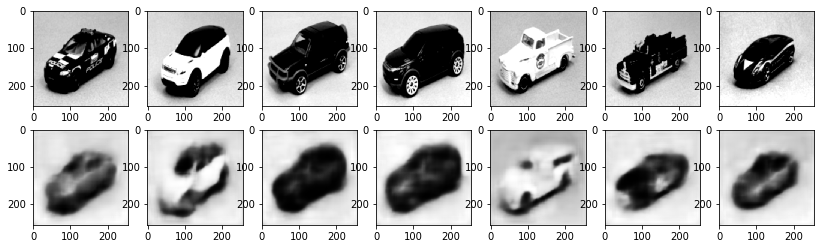

In [17]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [8]:
vae.fit(x_train, x_train, epochs=400, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

Train on 225 samples, validate on 25 samples
Epoch 1/400
225/225 [==============================] - 0s 1ms/step - loss: 365.2383 - val_loss: 548.7748
Epoch 2/400
225/225 [==============================] - 0s 1ms/step - loss: 362.5425 - val_loss: 564.4474
Epoch 3/400
225/225 [==============================] - 0s 1ms/step - loss: 360.4465 - val_loss: 529.9320
Epoch 4/400
225/225 [==============================] - 0s 1ms/step - loss: 357.0410 - val_loss: 562.8412
Epoch 5/400
225/225 [==============================] - 0s 1ms/step - loss: 350.8545 - val_loss: 541.3297
Epoch 6/400
225/225 [==============================] - 0s 1ms/step - loss: 353.2598 - val_loss: 583.5049
Epoch 7/400
225/225 [==============================] - 0s 1ms/step - loss: 349.5322 - val_loss: 539.5864
Epoch 8/400
225/225 [==============================] - 0s 1ms/step - loss: 355.5680 - val_loss: 582.5704
Epoch 9/400
225/225 [==============================] - 0s 1ms/step - loss: 358.8001 - val_loss: 547.5116
Epoch 10/4

Epoch 78/400
225/225 [==============================] - 0s 1ms/step - loss: 358.0134 - val_loss: 541.4695
Epoch 79/400
225/225 [==============================] - 0s 1ms/step - loss: 348.3589 - val_loss: 585.0071
Epoch 80/400
225/225 [==============================] - 0s 1ms/step - loss: 350.1379 - val_loss: 538.0617
Epoch 81/400
225/225 [==============================] - 0s 1ms/step - loss: 340.1532 - val_loss: 584.5781
Epoch 82/400
225/225 [==============================] - 0s 1ms/step - loss: 340.8118 - val_loss: 545.7830
Epoch 83/400
225/225 [==============================] - 0s 1ms/step - loss: 344.3233 - val_loss: 594.2539
Epoch 84/400
225/225 [==============================] - 0s 1ms/step - loss: 348.1797 - val_loss: 549.7836
Epoch 85/400
225/225 [==============================] - 0s 1ms/step - loss: 357.1986 - val_loss: 595.8457
Epoch 86/400
225/225 [==============================] - 0s 1ms/step - loss: 351.9560 - val_loss: 546.3324
Epoch 87/400
225/225 [========================

Epoch 155/400
225/225 [==============================] - 0s 1ms/step - loss: 343.1686 - val_loss: 614.1831
Epoch 156/400
225/225 [==============================] - 0s 1ms/step - loss: 349.0717 - val_loss: 559.3360
Epoch 157/400
225/225 [==============================] - 0s 1ms/step - loss: 354.2236 - val_loss: 609.8096
Epoch 158/400
225/225 [==============================] - 0s 1ms/step - loss: 348.7240 - val_loss: 552.0725
Epoch 159/400
225/225 [==============================] - 0s 1ms/step - loss: 355.1482 - val_loss: 602.4279
Epoch 160/400
225/225 [==============================] - 0s 1ms/step - loss: 349.7837 - val_loss: 550.6075
Epoch 161/400
225/225 [==============================] - 0s 1ms/step - loss: 351.8503 - val_loss: 591.9278
Epoch 162/400
225/225 [==============================] - 0s 1ms/step - loss: 349.8412 - val_loss: 545.2784
Epoch 163/400
225/225 [==============================] - 0s 1ms/step - loss: 341.9350 - val_loss: 585.6292
Epoch 164/400
225/225 [==============

Epoch 232/400
225/225 [==============================] - 0s 1ms/step - loss: 343.8922 - val_loss: 603.4725
Epoch 233/400
225/225 [==============================] - 0s 1ms/step - loss: 335.8811 - val_loss: 552.6119
Epoch 234/400
225/225 [==============================] - 0s 1ms/step - loss: 335.8499 - val_loss: 600.3222
Epoch 235/400
225/225 [==============================] - 0s 1ms/step - loss: 334.3886 - val_loss: 567.6158
Epoch 236/400
225/225 [==============================] - 0s 1ms/step - loss: 342.4070 - val_loss: 606.3283
Epoch 237/400
225/225 [==============================] - 0s 1ms/step - loss: 350.7109 - val_loss: 581.5695
Epoch 238/400
225/225 [==============================] - 0s 1ms/step - loss: 350.1245 - val_loss: 600.6774
Epoch 239/400
225/225 [==============================] - 0s 1ms/step - loss: 351.9553 - val_loss: 578.7597
Epoch 240/400
225/225 [==============================] - 0s 1ms/step - loss: 335.7414 - val_loss: 577.4444
Epoch 241/400
225/225 [==============

Epoch 309/400
225/225 [==============================] - 0s 1ms/step - loss: 328.1130 - val_loss: 563.9603
Epoch 310/400
225/225 [==============================] - 0s 1ms/step - loss: 337.2011 - val_loss: 608.4826
Epoch 311/400
225/225 [==============================] - 0s 1ms/step - loss: 336.5096 - val_loss: 569.0391
Epoch 312/400
225/225 [==============================] - 0s 1ms/step - loss: 351.8584 - val_loss: 628.8467
Epoch 313/400
225/225 [==============================] - 0s 1ms/step - loss: 356.9217 - val_loss: 555.5190
Epoch 314/400
225/225 [==============================] - 0s 1ms/step - loss: 341.3760 - val_loss: 633.5170
Epoch 315/400
225/225 [==============================] - 0s 1ms/step - loss: 342.4901 - val_loss: 584.6138
Epoch 316/400
225/225 [==============================] - 0s 1ms/step - loss: 347.4698 - val_loss: 677.5530
Epoch 317/400
225/225 [==============================] - 0s 1ms/step - loss: 353.2520 - val_loss: 592.5670
Epoch 318/400
225/225 [==============

Epoch 386/400
225/225 [==============================] - 0s 1ms/step - loss: 324.3625 - val_loss: 606.6633
Epoch 387/400
225/225 [==============================] - 0s 1ms/step - loss: 325.0501 - val_loss: 556.7349
Epoch 388/400
225/225 [==============================] - 0s 1ms/step - loss: 322.3202 - val_loss: 591.9525
Epoch 389/400
225/225 [==============================] - 0s 1ms/step - loss: 320.7042 - val_loss: 554.1962
Epoch 390/400
225/225 [==============================] - 0s 1ms/step - loss: 310.2013 - val_loss: 587.7685
Epoch 391/400
225/225 [==============================] - 0s 1ms/step - loss: 304.4936 - val_loss: 546.7791
Epoch 392/400
225/225 [==============================] - 0s 1ms/step - loss: 304.8417 - val_loss: 587.8528
Epoch 393/400
225/225 [==============================] - 0s 1ms/step - loss: 300.0250 - val_loss: 556.2150
Epoch 394/400
225/225 [==============================] - 0s 1ms/step - loss: 301.9355 - val_loss: 577.5433
Epoch 395/400
225/225 [==============

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=40, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=100, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=40, batch_size=1024,
        shuffle=True, validation_data=(x_test,x_test))

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=100, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=100, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))
vae.save('model_vae_3stage.h5')

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=1000, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))
vae.save('model_vae_3stage.h5')

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
with open("model_vae_3stage.yaml", "w") as yaml_model_file:
    yaml_model_file.write(vae.to_yaml())